In [2]:
# import packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load Data Freeway 1 ------------------------------------------
data = pd.read_csv("output/STEP2. after_add_Speed/FW1_North_All(afterSQL).csv")

In [14]:
data.describe()

,other,num,startkilo,endkilo,year,startTime_millionSec,endTime_millionSec,crash,lane,minlane,...,heavy_rate,Var_volume,Var_PCU,Var_Speed_volume,Var_Speed_PCU,fw1_northcol,index,DayType,PeakHour,Hour
count,4.996989e+06,4.996989e+06,4.996989e+06,4.996989e+06,4996989.0,4.996989e+06,4.996989e+06,4.996989e+06,4.996989e+06,4.996989e+06,...,4.996989e+06,4996989.0,4996989.0,4996989.0,4996989.0,0.0,4.996989e+06,4.996989e+06,4.996989e+06,4.996989e+06
mean,4.348527e+05,2.583850e+05,5.009619e+01,5.211251e+01,2020.0,1.593613e+09,1.593613e+09,9.173524e-04,2.978970e+00,1.239170e-01,...,1.638464e-01,0.0,0.0,0.0,0.0,NaN,4.348527e+05,3.835442e-01,1.561694e-01,1.145653e+01
std,2.951986e+05,1.879315e+05,2.857493e+01,2.860250e+01,0.0,9.127573e+06,9.127573e+06,3.074619e-02,6.605437e-01,3.294869e-01,...,1.284078e-01,0.0,0.0,0.0,0.0,NaN,2.951986e+05,6.090993e-01,3.630159e-01,6.895603e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2020.0,1.577808e+09,1.577808e+09,0.000000e+00,2.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.656440e+05,1.052420e+05,2.600000e+01,2.800000e+01,2020.0,1.585708e+09,1.585708e+09,0.000000e+00,3.000000e+00,0.000000e+00,...,7.800000e-02,0.0,0.0,0.0,0.0,NaN,1.656440e+05,0.000000e+00,0.000000e+00,5.000000e+00
50%,4.046640e+05,2.246690e+05,5.200000e+01,5.400000e+01,2020.0,1.593608e+09,1.593608e+09,0.000000e+00,3.000000e+00,0.000000e+00,...,1.270000e-01,0.0,0.0,0.0,0.0,NaN,4.046640e+05,0.000000e+00,0.000000e+00,1.100000e+01
75%,6.850350e+05,3.728510e+05,7.600000e+01,7.800000e+01,2020.0,1.601512e+09,1.601512e+09,0.000000e+00,3.000000e+00,0.000000e+00,...,1.970000e-01,0.0,0.0,0.0,0.0,NaN,6.850350e+05,1.000000e+00,0.000000e+00,1.700000e+01
max,9.999990e+05,8.423000e+05,9.800000e+01,1.008000e+02,2020.0,1.609430e+09,1.609430e+09,3.000000e+00,5.000000e+00,1.000000e+00,...,9.700000e-01,0.0,0.0,0.0,0.0,NaN,9.999990e+05,2.000000e+00,1.000000e+00,2.300000e+01


# Data pre-process

## Drop data FREEWAY 1

In [15]:
# drop data
data.drop(['other', 'num', 'startkilo', 'endkilo', 'year', 'date', 
           'starttime', 'startTime_millionSec', 'endtime', 'endTime_millionSec'], 
          axis=1, inplace=True)
# Since the values of feature "speed limit" are all the same, we drop the feature
data.drop(['speedlimit'], axis=1, inplace=True)
data.drop(['pavement', 'cement', 'remark', 'one'], axis=1, inplace=True)
# unrelated factors
data.drop(['fw1_northcol', 'index'], axis=1, inplace=True)
# drop columns 
data.drop(['minradiuslength',
           'Var_windspeed', 'Var_rain', 'Var_volume', 
           'Var_PCU', 'Var_Speed_volume', 'Var_Speed_PCU'], axis=1, inplace=True)

print(data.columns)

Index(['crash', 'lane', 'minlane', 'addlane', 'totalwidth', 'lanewidth',
       'inshoulder', 'outshoulder', 'upslope', 'downslope', 'upslopelength',
       'downslopelength', 'maxupslope', 'maxdownslope', 'curvelength',
       'minradius', 'continuouscurve', 'interchange', 'tunnellength',
       'tunnelin', 'tunnelout', 'shouderoallow', 'camera', 'service',
       'windspeed', 'rain', 'volume_S', 'volume_L', 'volume_T', 'volume',
       'PCU', 'SpaceSpeed_S', 'SpaceSpeed_L', 'SpaceSpeed_T', 'AvgSpaceSpeed',
       'MedianSpaceSpeed', 'Density_byAvgSpeed', 'Density_byMedianSpeed',
       'Density_byVehicle_S_Speed', 'Speed_volume', 'Speed_PCU', 'heavy_rate',
       'CrashType', 'DayType', 'PeakHour', 'Hour'],
      dtype='object')


In [16]:
print(data.dtypes)

crash                          int64
lane                           int64
minlane                        int64
addlane                        int64
totalwidth                   float64
lanewidth                    float64
inshoulder                     int64
outshoulder                    int64
upslope                      float64
downslope                    float64
upslopelength                  int64
downslopelength                int64
maxupslope                   float64
maxdownslope                 float64
curvelength                    int64
minradius                      int64
continuouscurve                int64
interchange                    int64
tunnellength                   int64
tunnelin                       int64
tunnelout                      int64
shouderoallow                  int64
camera                         int64
service                        int64
windspeed                    float64
rain                         float64
volume_S                       int64
v

### DEPRECATE: data['rain'] has many non-numeric values: "&", try to fix them

In [7]:
# data['rain'] has many non-numeric values: "&", try to fix them -> 20220707 has fixed this. 
# data['rain'] = pd.to_numeric(data['rain'], errors='coerce').fillna(0, downcast='float')
# data['windspeed'] = pd.to_numeric(data['windspeed'], errors='coerce').fillna(0, downcast='float')
# data['Speed_volume'] = pd.to_numeric(data['Speed_volume'], errors='coerce').fillna(0, downcast='float')
# data['Speed_PCU'] = pd.to_numeric(data['Speed_PCU'], errors='coerce').fillna(0, downcast='float')
# data['heavy_rate'] = pd.to_numeric(data['heavy_rate'], errors='coerce').fillna(0, downcast='float')

print(data.dtypes)

NameError: name 'data' is not defined

In [17]:
print(data.groupby("CrashType").size())

CrashType
A1          7
A2        276
A3       4232
\N    4992474
dtype: int64


### Convert to categorial type..................

In [18]:
#Convert to categorial type..................
data["crash"] = data["crash"].astype("category") 
## !!!!! WARNING!!! ordered = True means the variable is ordered, which means it can be compared. 
## Otherwise, it can not be compared. 
data["minlane"] = data["minlane"].astype("category")
data["addlane"] = data["addlane"].astype("category")
data["continuouscurve"] = data["continuouscurve"].astype("category")
data["interchange"] = data["interchange"].astype("category")
data["tunnelin"] = data["tunnelin"].astype("category")
data["tunnelout"] = data["tunnelout"].astype("category")
data["shouderoallow"] = data["shouderoallow"].astype("category")
data["camera"] = data["camera"].astype("category")
data["service"] = data["service"].astype("category")
data["DayType"] = data["DayType"].astype("category")
data["PeakHour"] = data["PeakHour"].astype("category")
data["Hour"] = data["Hour"].astype("category")

## Correlation heatmap 變數相關性確認

In [22]:
data.columns

Index(['crash', 'lane', 'minlane', 'addlane', 'totalwidth', 'lanewidth',
       'inshoulder', 'outshoulder', 'upslope', 'downslope', 'upslopelength',
       'downslopelength', 'maxupslope', 'maxdownslope', 'curvelength',
       'minradius', 'continuouscurve', 'interchange', 'tunnellength',
       'tunnelin', 'tunnelout', 'shouderoallow', 'camera', 'service',
       'windspeed', 'rain', 'volume_S', 'volume_L', 'volume_T', 'volume',
       'PCU', 'SpaceSpeed_S', 'SpaceSpeed_L', 'SpaceSpeed_T', 'AvgSpaceSpeed',
       'MedianSpaceSpeed', 'Density_byAvgSpeed', 'Density_byMedianSpeed',
       'Density_byVehicle_S_Speed', 'Speed_volume', 'Speed_PCU', 'heavy_rate',
       'CrashType', 'DayType', 'PeakHour', 'Hour'],
      dtype='object')

In [52]:
roadGeometryRelatedData = pd.concat([data['lane'], data['totalwidth'], data['lanewidth'],
                                     data['inshoulder'], data['outshoulder'], data['upslopelength'],
                                     data['downslopelength'], data['maxupslope'], data['maxdownslope'], 
                                     data['curvelength'], data['minradius'], data['tunnellength']], axis=1)
trafficFlowRelatedData = pd.concat([data['PCU'], data['volume'], 
                                    data['volume_S'], data['volume_T'], data['volume_L'], data['heavy_rate'], 
                                    data['SpaceSpeed_S'], data['SpaceSpeed_L'], data['SpaceSpeed_T'],
                                    data['AvgSpaceSpeed'], 
                                    data['Density_byAvgSpeed'], data['Density_byVehicle_S_Speed']], axis=1) 
weatherRelatedData = pd.concat([data['windspeed'], data['rain']], axis=1)

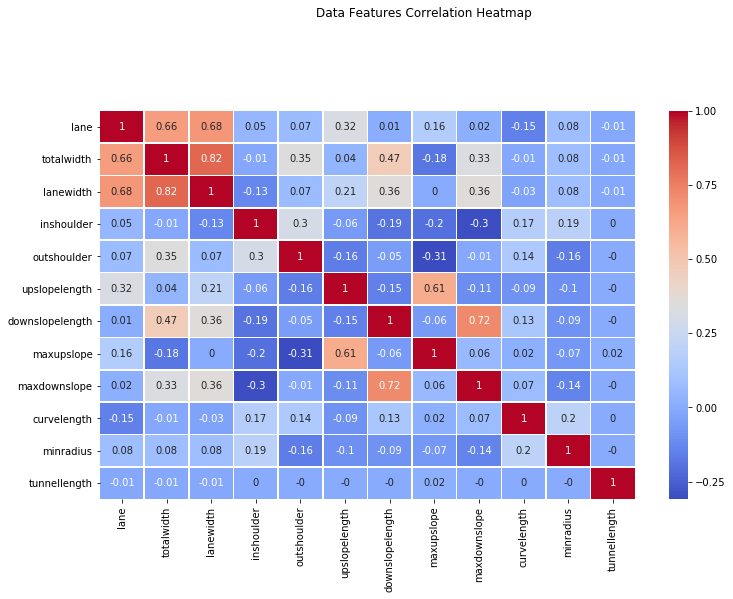

<Figure size 864x864 with 0 Axes>

In [24]:
# draw a heatmap -> roadGeometryRelatedData
corr = roadGeometryRelatedData.corr()
f, ax = plt.subplots(figsize=(12, 8))

plt.figure(figsize=(len(roadGeometryRelatedData.columns), len(roadGeometryRelatedData.columns)))
hm = sns.heatmap(round(corr,2),annot=True, ax=ax, cmap='coolwarm', linewidths=.5)
f.subplots_adjust(top=0.8)
ax.set_ylim(12, 0)
t= f.suptitle('Data Features Correlation Heatmap', fontsize=12)
plt.show() #畫出熱力圖

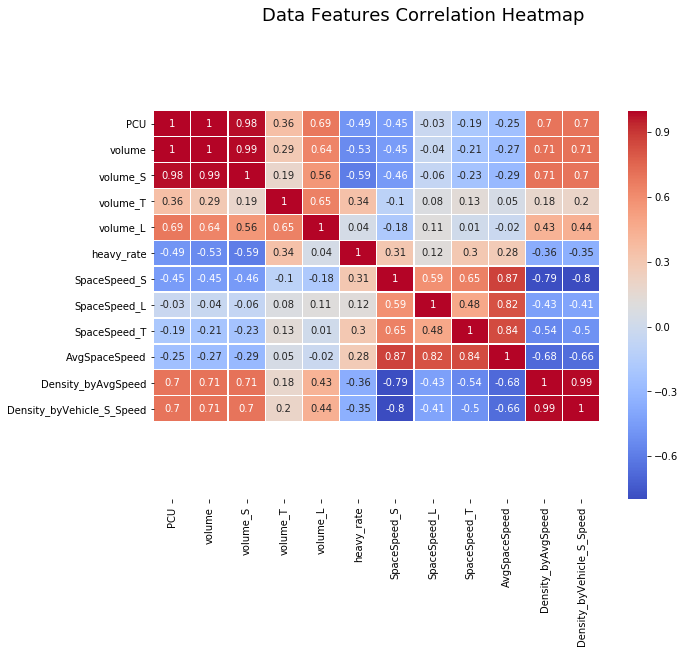

<Figure size 864x864 with 0 Axes>

In [53]:
# draw a heatmap -> trafficRelatedData
corr = trafficFlowRelatedData.corr()
f, ax = plt.subplots(figsize=(10, 8))

plt.figure(figsize=(len(trafficFlowRelatedData.columns), len(trafficFlowRelatedData.columns)))
hm = sns.heatmap(round(corr,2),annot=True, ax=ax, cmap='coolwarm', linewidths=.3)
f.subplots_adjust(top=0.8)
ax.set_ylim(15, 0)
t= f.suptitle('Data Features Correlation Heatmap', fontsize=18)
plt.show() #畫出熱力圖

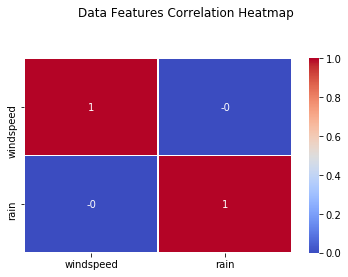

<Figure size 144x144 with 0 Axes>

In [20]:
# draw a heatmap -> trafficRelatedData
corr = weatherRelatedData.corr()
f, ax = plt.subplots(figsize=(6, 4))

plt.figure(figsize=(len(weatherRelatedData.columns), len(weatherRelatedData.columns)))
hm = sns.heatmap(round(corr,2),annot=True, ax=ax, cmap='coolwarm', linewidths=.5)
f.subplots_adjust(top=0.8)
ax.set_ylim(2, 0)
t= f.suptitle('Data Features Correlation Heatmap', fontsize=12)
plt.show() #畫出熱力圖

### by correlation analysis results, we delete data['Speed_volume'], data['volume_S'], data['volume_L'] and data['volume_T'] 

In [ ]:
# data.drop(['Speed_volume', 'volume_S', 'volume_T', 'volume_L'], axis=1, inplace=True)

# Before AI prediciton model: Seperare X and Y

### Select features that are used in the model into a list

In [30]:
#Select features that are used in the model into a list
features = list(data.columns)
for feature in ['crash', 'CrashType', 'Speed_volume', 'Speed_PCU']:
    features.remove(feature)  #Remove features
    
print(features)

['lane', 'minlane', 'addlane', 'totalwidth', 'lanewidth', 'inshoulder', 'outshoulder', 'upslope', 'downslope', 'upslopelength', 'downslopelength', 'maxupslope', 'maxdownslope', 'curvelength', 'minradius', 'continuouscurve', 'interchange', 'tunnellength', 'tunnelin', 'tunnelout', 'shouderoallow', 'camera', 'service', 'windspeed', 'rain', 'volume_S', 'volume_L', 'volume_T', 'volume', 'PCU', 'heavy_rate', 'DayType', 'PeakHour', 'Hour']


### (OPTION) Sample Data

In [35]:
data_sample = data.sample(n=1000000)

In [36]:
print(data_sample.groupby("crash").size()) #Check crash number in the sample data

crash
0    999086
1       904
2        10
3         0
dtype: int64


## Imbalanced Data: DownSampling

In [37]:
from sklearn.utils import resample

In [50]:
data_sample["crash"] = data_sample["crash"].astype('int32') #temporarily transform crash data into int32 -> for downsampling
no_crash = data_sample[data_sample.crash==0]
crash = data_sample[data_sample.crash>=1]
print(no_crash)

         crash  lane minlane addlane  totalwidth  lanewidth  inshoulder  \
262035       0     2       0       0         8.0        7.5           0   
4143296      0     3       0       0        15.3       11.3           1   
2856853      0     4       1       1        14.5       10.4           1   
3414306      0     3       0       0        12.0       11.3           1   
3345433      0     3       0       0        12.0       11.3           1   
...        ...   ...     ...     ...         ...        ...         ...   
1379559      0     2       0       0         8.5        7.5           1   
2811544      0     2       0       1         8.3        7.5           1   
4060571      0     3       0       0        15.3       11.3           1   
588179       0     3       0       0        12.1       11.1           1   
2005         0     2       0       0         8.5        7.5           1   

         outshoulder  upslope  downslope  ...  volume_T  volume    PCU  \
262035             0     

In [51]:
data_sample["crash"] = data_sample["crash"].astype("category") 

In [52]:
# downsample majority
no_crash_downsampled = resample(no_crash,
                          replace=False, # sample with replacement
                          n_samples=len(crash)*1, # match number in majority class
                          random_state=27) # reproducible results


In [53]:
# combine minority and downsampled majority
downsampled = pd.concat([no_crash_downsampled, crash])

In [54]:
down_Y = downsampled['crash']
down_X = downsampled.drop(['crash'], axis = 1)

In [55]:
#確認兩類別數目相同
print(downsampled.crash.value_counts())

0    914
1    904
2     10
Name: crash, dtype: int64


In [56]:
#確認資料內容
print(down_X.head())
print(down_Y.head())

         lane minlane addlane  totalwidth  lanewidth  inshoulder  outshoulder  \
192840      3       0       0        14.4       10.9           0            0   
891911      3       0       0        15.4       11.4           1            3   
4994730     3       0       0        13.7       11.0           1            0   
2198220     3       0       0        13.7       11.0           1            0   
4985643     3       0       0        15.2       11.1           1            3   

         upslope  downslope  upslopelength  ...  volume_T  volume    PCU  \
192840       2.0        2.0             11  ...        12     118  139.0   
891911       0.0        0.0              0  ...         6     408  427.8   
4994730      0.0        0.0              0  ...        20     143  179.8   
2198220      0.0        0.0              0  ...        19     508  545.6   
4985643      0.0        0.0              0  ...         9     440  462.8   

         Speed_volume  Speed_PCU heavy_rate CrashType  D

### Seperate X and Y data

In [58]:
data_Y = data_sample['crash']
data_X = data_sample[features] 

In [ ]:
data_Y.describe()

###  DO NOT NEED TO MANUALLY CONVERT FEATURES INTO DUMMY VARIABLES
* all categorial types will automatically convert to categorial variable 

In [57]:
print(f"X = {data_X.columns}")

NameError: name 'data_X' is not defined

In [ ]:
data_X.fillna(0, inplace=True)

In [ ]:
data_X.isna().any()

# Prediction: SVM

In [59]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1)
accuracy = cross_val_score(svc,down_X,down_Y,cv=5,scoring="accuracy")
F1 = cross_val_score(svc,down_X,down_Y,cv=5,scoring="f1")
precision = cross_val_score(svc,down_X,down_Y,cv=5,scoring="precision")
recall = cross_val_score(svc,down_X,down_Y,cv=5,scoring="recall")

print("accuracy = ",accuracy)
print("accuracy_mean = ",accuracy.mean())
print("F1 = ",F1)
print("precision = ",precision)
print("recall = ",recall)

C:\Users\WangRabbit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: 'A3'

# Prediction: Linear Regression

### convert crash values to 1

In [ ]:
# replace crash values
## convert crash values to 1
data.loc[data["crash"] >= 1, "crash"] = 1 

### convert it to .. 

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=0)

In [ ]:
X_train

In [ ]:
model=sm.Logit(y_train,X_train,random_state=0)
result=model.fit()
print(result.summary())

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
#
y_pred=logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))